In [1]:
!pip install -Uqq fastbook

In [4]:
import fastbook
fastbook.setup_book()

In [6]:
??fastbook.setup_book

In [8]:
from fastbook import *
from fastai.vision.all import *

In [9]:
mask = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [12]:
path = Path("../data")

In [13]:
fns = get_image_files(path)
fns

(#1376) [Path('../data/without_mask/375.jpg'),Path('../data/without_mask/augmented_image_117.jpg'),Path('../data/without_mask/51.jpg'),Path('../data/without_mask/188.jpg'),Path('../data/without_mask/augmented_image_161.jpg'),Path('../data/without_mask/404.jpg'),Path('../data/without_mask/augmented_image_114.jpg'),Path('../data/without_mask/augmented_image_306.jpg'),Path('../data/without_mask/augmented_image_155.jpg'),Path('../data/without_mask/348.jpg')...]

In [16]:
dls = mask.dataloaders(path)

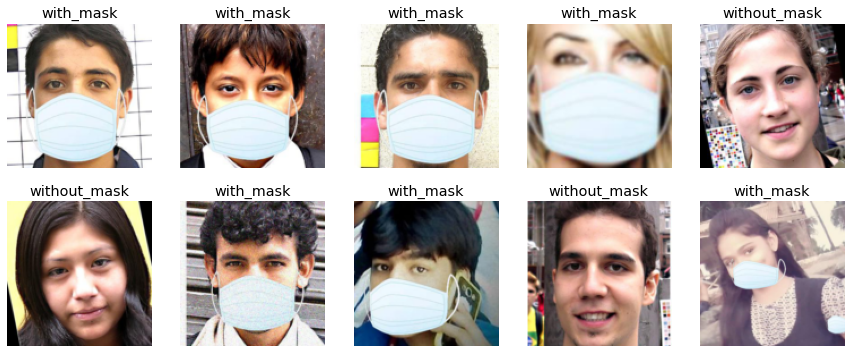

In [18]:
dls.valid.show_batch(max_n=10, nrows=2)

In [19]:
mask = mask.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = mask.dataloaders(path)

In [20]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.434625,0.040887,0.018182,00:24


epoch,train_loss,valid_loss,error_rate,time
0,0.041919,0.020655,0.003636,00:26
1,0.026711,0.032932,0.007273,00:24
2,0.018063,0.072067,0.007273,00:25
3,0.013495,0.062136,0.007273,00:24


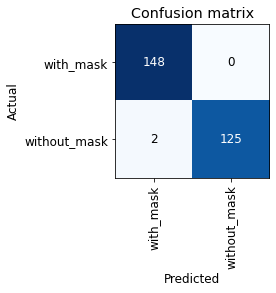

In [21]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [24]:
learn.export("model.pkl")

In [25]:
learn.dls.vocab

(#2) ['with_mask','without_mask']